# Plot monthly mean and hourly mean variables
- This script is used to plot monthly mean and hourly mean variables at four observation sites.
- Simulations: GM_SLUCM, GM_CLMU. 

In [4]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
home_path = "/gws/nopw/j04/duicv/yuansun/"

In [14]:
df_hour = pd.read_csv('./data_for_figure/diurnal_mean.csv')
df_hour = df_hour[df_hour['station'] != 'sensor'].copy().reset_index(drop=True)
df_hour.head()

,station,hour,TAS_obs,RH_obs,WIND_obs,TAS_wrf,RH_wrf,WIND_wrf,TAS_wrf-ctsm,RH_wrf-ctsm,WIND_wrf-ctsm
0,hadisd,0,9.427778,85.412278,2.436389,9.700556,79.891989,4.247520,9.509342,81.504017,2.901626
1,hadisd,1,9.174515,86.169746,2.481163,9.378943,81.369811,4.145826,9.197343,82.845775,2.846134
2,hadisd,2,8.917355,87.456813,2.407163,9.132435,82.540104,4.016994,8.953618,83.867710,2.755622
3,hadisd,3,8.670330,87.913510,2.413462,8.846683,83.576965,3.916244,8.669769,84.866137,2.692805
4,hadisd,4,8.490411,88.670329,2.410685,8.642313,84.519627,3.907339,8.489461,85.639630,2.699082


In [15]:
df_month = pd.read_csv('./data_for_figure/monthly_mean.csv')
df_month = df_month[df_month['station'] != 'sensor'].copy().reset_index(drop=True)
df_month.head()

,station,month,TAS_obs,RH_obs,WIND_obs,TAS_wrf,RH_wrf,WIND_wrf,TAS_wrf-ctsm,RH_wrf-ctsm,WIND_wrf-ctsm
0,hadisd,1,4.822581,87.305436,2.981183,4.437572,88.450765,3.907143,4.699762,87.563577,2.984410
1,hadisd,2,6.770833,82.545599,5.495387,7.005918,79.245976,7.272530,7.311687,77.957233,5.972927
2,hadisd,3,8.079301,72.631350,2.835215,8.411208,69.254576,4.525889,8.328930,71.758356,3.450980
3,hadisd,4,9.194444,70.867362,3.355278,9.806391,64.356146,4.609469,9.893415,66.089360,3.441452
4,hadisd,5,12.747312,76.793325,3.074462,13.481340,66.671205,4.701826,13.703759,67.008821,3.715542


In [16]:
station_list = ['hadisd', 'maqs', 'whitworth'] #, 'sensor'
model_list = ['obs', 'wrf', 'wrf-ctsm']
var_list = ['TAS', 'RH', 'WIND']
ncol = len(station_list)
nrow = len(var_list)
ymin_list = [[8, 50, 0], 
             [2, 50, 0]]
ymax_list = [[18, 92, 8],
             [22, 92, 12]]
ymin2_list = [[-1, -6, -2], 
              [-1, -6, -2]]
ymax2_list = [[1, 8, 0], 
              [1, 8, 0]]
yinterval_list = [4, 12, 3]
yinterval2_list = [0.5, 4, 0.5]
title_list = ['T2M at HadISD', 'T2M at MAQS', 'TA at Whitworth', #'(d) T2M at QuantAQ',
              'RH2M at HadISD', 'RH2M at MAQS', 'RH at Whitworth', #'(h) RH2M at QuantAQ',
              'W10M at HadISD', 'W10M at MAQS', 'WIND at Whitworth'] 
fontsize = 6
labelcolor = '#6b6b6b'
padding = 4
boundarywidth = 0.5
#lc1 = '#1b9e77'
lc1 = '#1f78b4'
#lc2 = '#d95f02'
lc2 = '#e31a1c'
lc3 = '#cb682c'
lc_list = [labelcolor, lc1, lc2, lc3]
#linestyle_list = ['--', '-', '-']
marker = 'o'
markersize = 0.5
linewidth = 0.5
labelsize = 6
tick_length = 2
ticklabel_pad = 0.1
unit_list = ['°C', '%', 'm/s']
handletextpad = 0.5
labelfont = 6
label_list = ['Observation', 'GM_SLUCM', 'GM_CLMU']
x_loc = 0.3
x_offset = 0.15
tag_list = ['hour', 'month']
xlim_list = [[0, 23], [1, 12]]
xticks_list = [[0, 6, 12, 18, 23], 
               [1, 3, 5, 7, 9, 11]]

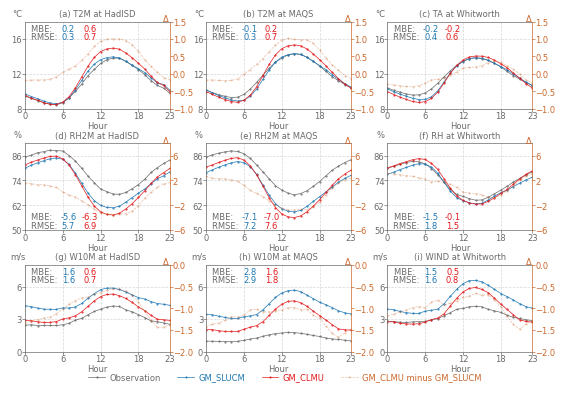

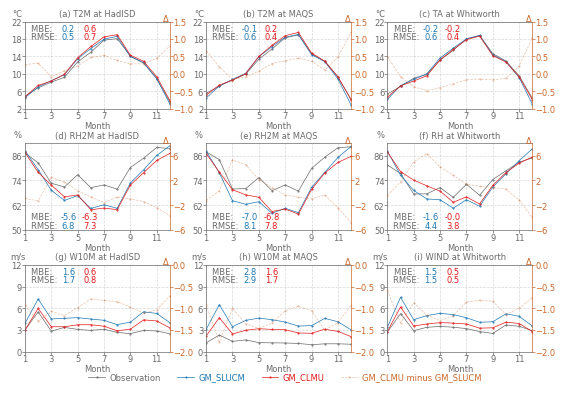

In [33]:
for d, data in enumerate([df_hour, df_month]):
    tag = tag_list[d]
    fig, axes = plt.subplots(nrow, ncol, figsize=(5.5, 3.75))
    ax = axes.flatten()
    #ax[-1].remove()
    for i in range(ncol*nrow):
        var = var_list[i // ncol]
        ymin = ymin_list[d][i // ncol]
        ymax = ymax_list[d][i // ncol]
        ymin2 = ymin2_list[d][i // ncol]
        ymax2 = ymax2_list[d][i // ncol]
        station = station_list[i % ncol]
        yinterval = yinterval_list[i // ncol]
        yinterval2 = yinterval2_list[i // ncol]
        unit = unit_list[i // ncol]
        df_station = data[data['station'] == station]
        #if (var =='WIND') & (station == 'sensor'):
            #continue
        for j, model in enumerate(model_list):
            lc = lc_list[j]
            df_model = df_station[[tag, f'{var}_{model}']]
            ax[i].plot(df_model[tag], df_model[f'{var}_{model}'], color=lc, label=label_list[j], 
                       marker=marker, markersize=markersize, linewidth=linewidth)
            #print(f'{var}_{model}', df_model[f'{var}_{model}'].mean())
            #ax[i].fill_between(df_model[tag], df_model[f'{var}_q05'] , df_model[f'{var}_q95'], label=label_list[j] + ': 5-95%', color=lc, alpha=0.15, edgecolor='none')
        ax[i].set_ylim(ymin, ymax) 
        ax[i].set_yticks(np.arange(ymin, ymax + 1, yinterval))   
        ax[i].set_xlim(xlim_list[d])
        ax[i].set_xticks(xticks_list[d])
        title = f'({string.ascii_lowercase[i]}) '+ title_list[i]
        ax[i].set_title(title, fontsize=fontsize, color=labelcolor, pad=padding)
        ax[i].tick_params(axis='y', labelleft = True, labelsize=labelsize, length=tick_length, pad=ticklabel_pad, width=boundarywidth, colors=labelcolor)    
        ax[i].tick_params(axis='x', labelsize=labelsize, length=tick_length, pad=ticklabel_pad, width=boundarywidth, colors=labelcolor)
        ax[i].set_xlabel(['Hour', 'Month'][d], fontsize=fontsize, color=labelcolor, labelpad=0.5)
        ax[i].set_ylabel(unit, fontsize=fontsize, rotation=0, ha='center', color=labelcolor, labelpad=2.5)
        ax[i].yaxis.set_label_coords(-0.05, 1.045)  
        ax[i].grid(True,linestyle='--',linewidth=linewidth, alpha=0.5)
        ax2 = ax[i].twinx()
        ax2.spines['top'].set_visible(False)
        ax2.spines['right'].set_visible(False)
        ax2.spines['bottom'].set_visible(False)
        ax2.spines['left'].set_visible(False)
        ax2.plot(df_model[tag], df_station[f'{var}_wrf-ctsm'] - df_station[f'{var}_wrf'], color=lc3, alpha=0.4,
                 label='GM_CLMU minus GM_SLUCM', marker=marker, markersize=markersize, linewidth=linewidth, linestyle='--') 
        ax2.tick_params(axis='y', labelleft=False, labelright=True, labelsize=labelsize, length=tick_length, pad=ticklabel_pad, width=boundarywidth, colors=lc3)    
        ax2.set_ylabel('$\Delta$', labelpad=5, rotation=0, ha='center', fontsize=labelfont,color=lc3)
        ax2.yaxis.set_label_coords(0.975, 1.11)
        ax2.set_ylim(ymin2, ymax2) 
        if var == 'WIND':
            ax2.set_yticks(np.arange(ymin2, ymax2 + 0.5, yinterval2)) 
            y_offset = 0
        else:    
            ax2.set_yticks(np.arange(ymin2, ymax2 + 1, yinterval2))  
            y_offset = 0.775
        for spine in ax[i].spines.values():
            spine.set_linewidth(boundarywidth)
            spine.set_edgecolor(labelcolor) 
        ax[i].spines['right'].set_color(lc3)    
        for m, model in enumerate(model_list[1:]):
            df_hour_model = df_station[f'{var}_{model}']
            df_hour_obs = df_station[f'{var}_obs']
            valid_mask = (~np.isnan(df_hour_model.values)) & (~np.isnan(df_hour_obs.values))
            rmse_model = np.sqrt(np.mean((df_hour_model.values[valid_mask] - df_hour_obs.values[valid_mask])**2))
            bias_model = np.mean(df_hour_model.values[valid_mask] - df_hour_obs.values[valid_mask])
            #r_model = np.corrcoef(df_hour_model.values, df_hour_obs.values)[0, 1]
            ax[i].text(x_loc + m*x_offset, 0.925 - y_offset * (i // ncol), np.round(bias_model,1), fontsize = labelsize, color = lc_list[m+1], ha='center', va='center', transform=ax[i].transAxes)
            ax[i].text(x_loc + m*x_offset, 0.825 - y_offset * (i // ncol), np.round(rmse_model,1), fontsize = labelsize, color = lc_list[m+1], ha='center', va='center', transform=ax[i].transAxes)
            #ax[i].text(x_loc + m*x_offset, 0.725 - y_offset * (i // ncol), np.round(r_model,2), fontsize = labelsize, color = lc_list[m+1], ha='center', va='center', transform=ax[i].transAxes)
        ax[i].text(0.125, 0.925 - y_offset * (i // ncol), 'MBE: ', fontsize = labelsize, color = labelcolor, ha='center', va='center', transform=ax[i].transAxes)
        ax[i].text(0.14, 0.825 - y_offset * (i // ncol), 'RMSE: ', fontsize = labelsize, color = labelcolor, ha='center', va='center', transform=ax[i].transAxes)
        #ax[i].text(0.14, 0.725 - y_offset * (i // ncol), 'R: ', fontsize = labelsize, color = labelcolor, ha='center', va='center', transform=ax[i].transAxes)
    lines, labels = ax[0].get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    legend = fig.legend(lines + lines2, labels + labels2, bbox_to_anchor=(0.5, -0.015), loc='lower center', frameon=False, 
                        handletextpad=handletextpad, fontsize=labelfont, ncol=4) # 0.88
    for i, text in enumerate(legend.get_texts()):
        text.set_color(lc_list[i%4])
    plt.subplots_adjust(left=0.0275, right=0.95, bottom=0.085, top=0.965, wspace=0.25, hspace= 0.4)    #0.05
    fig.savefig(f'validation_mean_{tag}.png', dpi=300)
    fig.savefig(f'validation_mean_{tag}.pdf', dpi=600)

# Description

In [4]:
df_month_august = df_month[df_month['month'] == 8]
df_month_august

,station,month,TAS_obs,RH_obs,TAS_wrf,RH_wrf,TAS_wrf-ctsm,RH_wrf-ctsm
7,hadisd,8,18.093117,69.797454,18.616392,60.508641,19.001601,59.864362
19,maqs,8,18.970390,68.847810,19.070090,58.417839,19.520871,57.713856
30,sensor,8,19.457103,64.674981,18.999817,58.322038,19.593347,56.942634
42,whitworth,8,17.827653,66.855680,18.148328,61.338500,18.648460,60.161564


In [74]:
df_month_jan = df_month[df_month['month'] == 1]
df_month_jan

,station,month,TAS_obs,RH_obs,TAS_wrf,RH_wrf,TAS_wrf-ctsm,RH_wrf-ctsm
0,hadisd,1,4.822581,87.305436,4.437572,88.450765,4.699762,87.563577
12,maqs,1,5.483949,87.788966,4.421692,88.242674,5.079884,86.988915
35,whitworth,1,5.330235,81.485679,3.959836,89.363850,4.859750,87.036135
